In [18]:
## package 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

In [19]:
## Import Data

## Election 
resultats_elections_france = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\donnee_resultats_elections_france.xlsx'
df_resultats_elections_france = pd.read_excel(resultats_elections_france)

## socioprofessionnelle
socioprofessionnelle = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\donnée_socioprofessionnelle_2020.xlsx'
df_socioprofessionnelle = pd.read_excel(socioprofessionnelle)

## securité
df_securite_geographique = pd.read_csv('C:/Users/Mehdi/OneDrive/Bureau/mspr_data/excel_files/donnee_securite_geographie.csv', sep = ';', encoding = 'latin1')

## densité pop
densite_population = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\Donnée_densité_population.xlsx'
df_densite_population = pd.read_excel(densite_population)

## Chomage
taux_chomage = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\Donnee_taux_chomage.xlsx'
df_taux_chomage = pd.read_excel(taux_chomage)

## revenu 
revenu_fiscal_moyen = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\Donnee_revenu_fiscal_moyen.xlsx'
df_revenu_fiscal_moyen = pd.read_excel(revenu_fiscal_moyen)

## age & sexe
age_sexe = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\donnee_age_sexe_2019.xlsx'
df_age_sexe = pd.read_excel(age_sexe)

## partie politique
partie_politique = r'C:\Users\Mehdi\OneDrive\Bureau\mspr_data\excel_files\partie_politique.xlsx'
df_partie_politique = pd.read_excel(partie_politique)

In [20]:
## nettoyage 
## Election 
## rename columns 
df_resultats_elections_france.columns = ['Code_du_département','Libellé_du_département','Code_de_la_circonscription','Libellé_de_la_circonscription','Code_de_la_commune','Libellé_de_la_commune','Code_du_b.vote','Inscrits','Abstentions','Pr_Abs_Ins','Votants','Pr_Vot_Ins','Blancs','Pr_Blancs_Ins','Pr_Blancs_Vot',
'Nuls','Pr_Nuls_Ins','Pr_Nuls_Vot','Exprimés','Pr_Exp_Ins','Pr_Exp_Vot','N°Panneau_Arthaud_Nathalie','Sexe_Arthaud_Nathalie','Nom_Arthaud_Nathalie','Prénom_Arthaud_Nathalie','Voix_Arthaud_Nathalie','Pr_Voix_Ins_Arthaud_Nathalie',
'Pr_Voix_Exp_Arthaud_Nathalie','N°Panneau_Roussel_Fabien','Sexe_Roussel_Fabien','Nom_Roussel_Fabien','Prénom_Roussel_Fabien','Voix_Roussel_Fabien','Pr_Voix_Ins_Roussel_Fabien','Pr_Voix_Exp_Roussel_Fabien','N°Panneau_Emmanuel_Macron','Sexe_Emmanuel_Macron','Nom_Emmanuel_Macron',
'Prénom_Emmanuel_Macron','Voix_Emmanuel_Macron','Pr_Voix_Ins_Emmanuel_Macron','Pr_Voix_Exp_Emmanuel_Macron','N°Panneau_Lassalle_Jean','Sexe_Lassalle_Jean','Nom_Lassalle_Jean','Prénom_Lassalle_Jean','Voix_Lassalle_Jean','Pr_Voix_Ins_Lassalle_Jean','Pr_Voix_Exp_Lassalle_Jean',
'N°Panneau_Le_Pen_Marine','Sexe_Le_Pen_Marine','Nom_Le_Pen_Marine','Prénom_Le_Pen_Marine','Voix_Le_Pen_Marine','Pr_Voix_Ins_Le_Pen_Marine','Pr_Voix_Exp_Le_Pen_Marine','N°Panneau_Zemmour_Eric','Sexe_Zemmour_Eric','Nom_Zemmour_Eric','Prénom_Zemmour_Eric',
'Voix_Zemmour_Eric','Pr_Voix_Ins_Zemmour_Eric','Pr_Voix_Exp_Zemmour_Eric','N°Panneau_Jean_Luc_Mélenchon','Sexe_Jean_Luc_Mélenchon','Nom_Jean_Luc_Mélenchon','Prénom_Jean_Luc_Mélenchon','Voix_Jean_Luc_Mélenchon','Pr_Voix_Ins_Jean_Luc_Mélenchon','Pr_Voix_Exp_Jean_Luc_Mélenchon',
'N°Panneau_Hidalgo_Anne','Sexe_Hidalgo_Anne','Nom_Hidalgo_Anne','Prénom_Hidalgo_Anne','Voix_Hidalgo_Anne','Pr_Voix_Ins_Hidalgo_Anne','Pr_Voix_Exp_Hidalgo_Anne','N°Panneau_Jadot_Yannick','Sexe_Jadot_Yannick','Nom_Jadot_Yannick','Prénom_Jadot_Yannick',
'Voix_Jadot_Yannick','Pr_Voix_Ins_Jadot_Yannick','Pr_Voix_Exp_Jadot_Yannick','N°Panneau_Valerie_Pecresse','Sexe_Valerie_Pecresse','Nom_Valerie_Pecresse','Prénom_Valerie_Pecresse','Voix_Valerie_Pecresse','Pr_Voix_Ins_Valerie_Pecresse','Pr_Voix_Exp_Valerie_Pecresse','N°Panneau_Philippe_Poutou',
'Sexe_Philippe_Poutou','Nom_Philippe_Poutou','Prénom_Philippe_Poutou','Voix_Philippe_Poutou','Pr_Voix_Ins_Philippe_Poutou','Pr_Voix_Exp_Philippe_Poutou','N°Panneau_Dupont_Aignan_Nicolas','Sexe_Dupont_Aignan_Nicolas','Nom_Dupont_Aignan_Nicolas','Prénom_Dupont_Aignan_Nicolas','Voix_Dupont_Aignan_Nicolas','Pr_Voix_Ins_Dupont_Aignan_Nicolas',
'Pr_Voix_Exp_Dupont_Aignan_Nicolas']
## select columns 
df_resultats_elections_france_global= df_resultats_elections_france[['Code_du_département',
       'Inscrits', 'Abstentions', 'Pr_Abs_Ins' , 'Votants','Pr_Vot_Ins','Blancs','Pr_Blancs_Ins','Pr_Blancs_Vot'
,'Nuls','Pr_Nuls_Ins','Pr_Nuls_Vot','Exprimés','Pr_Exp_Ins','Pr_Exp_Vot' , 
'Pr_Voix_Ins_Arthaud_Nathalie','Pr_Voix_Ins_Roussel_Fabien','Pr_Voix_Ins_Emmanuel_Macron', 'Pr_Voix_Ins_Lassalle_Jean', 'Pr_Voix_Ins_Le_Pen_Marine','Pr_Voix_Ins_Zemmour_Eric','Pr_Voix_Ins_Jean_Luc_Mélenchon','Pr_Voix_Ins_Hidalgo_Anne',
'Pr_Voix_Ins_Jadot_Yannick' , 'Pr_Voix_Ins_Valerie_Pecresse' , 'Pr_Voix_Ins_Philippe_Poutou' , 'Pr_Voix_Ins_Dupont_Aignan_Nicolas']]

In [21]:

# Aggrégation de différentes variables avec différentes fonctions
df_resultats_elections_france_global_agg = df_resultats_elections_france_global.groupby('Code_du_département').agg({
    'Inscrits': 'sum', 
    'Abstentions' : 'sum', 
    'Pr_Abs_Ins' : 'mean' , 
    'Votants': 'sum',
    'Pr_Vot_Ins' : 'mean',
    'Blancs': 'sum',
    'Pr_Blancs_Ins' : 'mean',
    'Pr_Blancs_Vot': 'mean',
    'Nuls': 'sum',
    'Pr_Nuls_Ins': 'mean',
    'Pr_Nuls_Vot': 'mean',
    'Exprimés': 'sum',
    'Pr_Exp_Ins': 'mean',
    'Pr_Exp_Vot': 'mean' , 
    'Pr_Voix_Ins_Arthaud_Nathalie': 'mean',
    'Pr_Voix_Ins_Roussel_Fabien': 'mean',
    'Pr_Voix_Ins_Emmanuel_Macron': 'mean', 
    'Pr_Voix_Ins_Lassalle_Jean': 'mean', 
    'Pr_Voix_Ins_Le_Pen_Marine': 'mean',
    'Pr_Voix_Ins_Zemmour_Eric': 'mean',
    'Pr_Voix_Ins_Jean_Luc_Mélenchon': 'mean',
    'Pr_Voix_Ins_Hidalgo_Anne': 'mean',
    'Pr_Voix_Ins_Jadot_Yannick': 'mean' , 
    'Pr_Voix_Ins_Valerie_Pecresse': 'mean' , 
    'Pr_Voix_Ins_Philippe_Poutou': 'mean' , 
    'Pr_Voix_Ins_Dupont_Aignan_Nicolas': 'mean'
})

df_resultats_elections_france_global_agg = df_resultats_elections_france_global_agg.reset_index(drop=False)

In [22]:
df_resultats_elections_france_global_agg.head(100)

,Code_du_département,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,Pr_Blancs_Vot,Nuls,...,Pr_Voix_Ins_Emmanuel_Macron,Pr_Voix_Ins_Lassalle_Jean,Pr_Voix_Ins_Le_Pen_Marine,Pr_Voix_Ins_Zemmour_Eric,Pr_Voix_Ins_Jean_Luc_Mélenchon,Pr_Voix_Ins_Hidalgo_Anne,Pr_Voix_Ins_Jadot_Yannick,Pr_Voix_Ins_Valerie_Pecresse,Pr_Voix_Ins_Philippe_Poutou,Pr_Voix_Ins_Dupont_Aignan_Nicolas
0,01,438109,97541,21.171438,340568,78.828596,5641,1.290394,1.631267,1903,...,20.468065,2.832346,20.766267,6.373493,12.989589,1.331045,3.629914,4.105445,0.547140,2.186404
1,02,373544,101089,23.640400,272455,76.359651,3767,1.087936,1.414569,2828,...,16.319394,2.107895,29.845626,5.470883,10.049066,0.766140,1.966448,3.609723,0.583409,1.713501
2,03,249991,58497,22.154801,191494,77.845265,3749,1.555509,1.981327,1790,...,19.276792,3.626681,20.974558,5.127788,12.172146,1.249270,2.300708,4.331836,0.648673,1.787920
3,04,128075,29290,21.602966,98785,78.016844,1478,1.226996,1.574411,624,...,15.856920,4.408783,19.624791,6.163004,17.721977,1.059392,3.119544,3.016502,0.760190,2.015323
4,05,113519,25357,20.154493,88162,79.845604,1395,1.298841,1.606184,532,...,17.806908,4.173961,17.342850,5.385024,18.762367,1.230000,4.334010,3.927391,0.723671,1.998986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,733529,192853,25.622232,540676,74.254476,8027,1.108274,1.485968,3064,...,19.017411,1.291504,12.990555,5.317312,23.157016,0.827818,2.885623,3.766165,0.477226,1.278829
96,ZA,316023,174592,55.469192,141431,44.530855,2719,0.855439,1.935392,3627,...,5.697648,0.323848,7.668599,0.941853,23.906081,0.710499,0.582447,1.242090,0.221045,0.664608
97,ZB,304594,174588,57.606156,130006,42.393874,4001,1.300270,3.138709,3056,...,6.587177,0.374174,5.471622,1.001652,21.207718,1.233994,0.632042,1.564174,0.313243,0.964354
98,ZC,102993,65754,64.384403,37239,35.615672,825,0.786269,2.147313,553,...,5.111791,0.509552,6.130224,1.467090,17.096119,0.491418,0.870970,0.929478,0.471716,0.688582


In [23]:
######## définir le candidat gagant par chaque département 
# Liste des noms des candidats
candidats = ['Arthaud_Nathalie', 'Roussel_Fabien', 'Emmanuel_Macron', 'Lassalle_Jean', 'Le_Pen_Marine', 'Zemmour_Eric', 'Jean_Luc_Mélenchon','Hidalgo_Anne', 'Jadot_Yannick', 'Valerie_Pecresse', 'Philippe_Poutou', 'Dupont_Aignan_Nicolas']

# Initialisation d'une liste pour stocker les résultats par département
results = []

# Parcours de chaque département
for departement, data in df_resultats_elections_france_global_agg.groupby('Code_du_département'):
    # Initialisation des variables pour stocker le nom du candidat avec le total le plus élevé et le total correspondant pour ce département
    candidat_max = None
    total_max = 0
   
    # Parcours de la liste des noms de candidats
    for candidat in candidats:
        # Calcul de la somme totale des voix pour ce candidat dans ce département
        total_voix_candidat = data[f'Pr_Voix_Ins_{candidat}'].sum()
       
        # Vérification si le total est supérieur au maximum actuel
        if total_voix_candidat > total_max:
            total_max = total_voix_candidat
            candidat_max = candidat
   
    # Ajout des résultats pour ce département à la liste des résultats
    results.append({'Code_du_département': departement, 'Candidat': candidat_max, 'Total_voix': total_max})

# Création du DataFrame à partir de la liste des résultats
df_resultats = pd.DataFrame(results)

# Affichage du DataFrame
df_resultats.head(200)

,Code_du_département,Candidat,Total_voix
0,01,Le_Pen_Marine,20.766267
1,02,Le_Pen_Marine,29.845626
2,03,Le_Pen_Marine,20.974558
3,04,Le_Pen_Marine,19.624791
4,05,Jean_Luc_Mélenchon,18.762367
...,...,...,...
102,ZP,Emmanuel_Macron,14.548240
103,ZS,Jean_Luc_Mélenchon,20.777500
104,ZW,Emmanuel_Macron,22.200000
105,ZX,Jean_Luc_Mélenchon,8.829231


In [24]:
# Effectuer une jointure entre df_resultats et df_resultats_elections_france_global_agg sur la colonne 'Code_du_département'
df_joint = pd.merge(df_resultats, df_resultats_elections_france_global_agg, on='Code_du_département', how='left')
df_joint.head()

,Code_du_département,Candidat,Total_voix,Inscrits,Abstentions,Pr_Abs_Ins,Votants,Pr_Vot_Ins,Blancs,Pr_Blancs_Ins,...,Pr_Voix_Ins_Emmanuel_Macron,Pr_Voix_Ins_Lassalle_Jean,Pr_Voix_Ins_Le_Pen_Marine,Pr_Voix_Ins_Zemmour_Eric,Pr_Voix_Ins_Jean_Luc_Mélenchon,Pr_Voix_Ins_Hidalgo_Anne,Pr_Voix_Ins_Jadot_Yannick,Pr_Voix_Ins_Valerie_Pecresse,Pr_Voix_Ins_Philippe_Poutou,Pr_Voix_Ins_Dupont_Aignan_Nicolas
0,01,Le_Pen_Marine,20.766267,438109,97541,21.171438,340568,78.828596,5641,1.290394,...,20.468065,2.832346,20.766267,6.373493,12.989589,1.331045,3.629914,4.105445,0.547140,2.186404
1,02,Le_Pen_Marine,29.845626,373544,101089,23.640400,272455,76.359651,3767,1.087936,...,16.319394,2.107895,29.845626,5.470883,10.049066,0.766140,1.966448,3.609723,0.583409,1.713501
2,03,Le_Pen_Marine,20.974558,249991,58497,22.154801,191494,77.845265,3749,1.555509,...,19.276792,3.626681,20.974558,5.127788,12.172146,1.249270,2.300708,4.331836,0.648673,1.787920
3,04,Le_Pen_Marine,19.624791,128075,29290,21.602966,98785,78.016844,1478,1.226996,...,15.856920,4.408783,19.624791,6.163004,17.721977,1.059392,3.119544,3.016502,0.760190,2.015323
4,05,Jean_Luc_Mélenchon,18.762367,113519,25357,20.154493,88162,79.845604,1395,1.298841,...,17.806908,4.173961,17.342850,5.385024,18.762367,1.230000,4.334010,3.927391,0.723671,1.998986


In [25]:
## nettoyage data socioprofessionnelle 
# rename code to Code_du_département dans socioprofessionnelle_data_Frame
df_socioprofessionnelle.rename(columns={'Code': 'Code_du_département'}, inplace=True)

# jointure entre df_socioprofessionnelle et df_resultats_elections_france_global_agg sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_socioprofessionnelle, on='Code_du_département', how='left')


In [26]:
## nettoyage data densité pop 

densite_population = r'C:/Users/Mehdi/OneDrive/Bureau/mspr_data/excel_files/Donnée_densité_population.xlsx'
df_densite_population = pd.read_excel(densite_population)

# rename code to Code_du_département dans densite_population_data_Frame
df_densite_population.rename(columns={'Code': 'Code_du_département'}, inplace=True)

## types columns
df_densite_population['Code_du_département'] = df_densite_population['Code_du_département'].astype(str)
df_joint['Code_du_département'] = df_joint['Code_du_département'].astype(str)

# jointure entre df_densite_population et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_densite_population, on='Code_du_département', how='left')

In [27]:
## add chomage data 
# rename code to Code_du_département dans densite_population_data_Frame
df_taux_chomage.rename(columns={'Code': 'Code_du_département'}, inplace=True)
df_taux_chomage['Code_du_département'] = df_taux_chomage['Code_du_département'].astype(str)

# jointure entre df_densite_population et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_taux_chomage, on='Code_du_département', how='left')


In [28]:
## add moyen revenu fiscal
df_revenu_fiscal_moyen.rename(columns={'Département\t': 'Départements'}, inplace=True)

# jointure entre df_revenu_fiscal_moyen et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_revenu_fiscal_moyen, on='Départements', how='left')


In [29]:
#### import data
#age_sexe = r'C:\Users\fnour\Documents\Projet_data\DATA\donnee_age_sexe_2019.xlsx'
#df_age_sexe = pd.read_excel(age_sexe)

## add data age par sexe
df_age_sexe.rename(columns={'DEP': 'Code_du_département'}, inplace=True)

## cleanning 
df_age_sexe['REG'] = df_age_sexe['REG'].astype(str)
df_age_sexe['Code_du_département'] = df_age_sexe['Code_du_département'].astype(str)

# jointure entre df_revenu_fiscal_moyen et df_joint sur la colonne 'Code_du_département'
df_joint = pd.merge(df_joint, df_age_sexe, on='Code_du_département', how='left')

In [31]:
## add data sécurité 
df_securite_geographique = pd.read_csv('C:/Users/Mehdi/OneDrive/Bureau/mspr_data/excel_files/donnee_securite_geographie.csv', sep = ';', encoding = 'latin1')

## cleaning
df_securite_geographique.columns = ['classe', 'annee', 'Code_du_département', 'Code_region',
       'unite_compte', 'millPOP', 'millLOG', 'faits', 'POP', 'LOG','tauxpourmille']

# Remplacer les virgules par des points et ensuite convertir en float
df_securite_geographique['LOG'] = df_securite_geographique['LOG'].str.replace(',', '.').astype(float)
df_securite_geographique['tauxpourmille'] = df_securite_geographique['tauxpourmille'].str.replace(',', '.').astype(float)

## structurer les données 

pivot_df = df_securite_geographique.pivot_table(
                values=['faits', 'POP' , 'LOG', 'tauxpourmille'],  # Données à résumer
                index=['annee', 'Code_du_département'],     # Nouvelles lignes
                columns='classe',                           # Nouvelles colonnes
                aggfunc={'faits': 'sum', 'POP': 'mean' , 'LOG':'mean' , 'tauxpourmille':'mean' },  # Fonctions d'agrégation
                fill_value=0)                               # Valeur de remplacement pour NaN


pivot_df.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in pivot_df.columns.values]

# Ensuite, potentiellement, réinitialiser l'index si souhaité
pivot_df = pivot_df.reset_index()

# select only 2022
df_2022 = pivot_df[pivot_df['annee'] == 22]

# jointure 
df_joint = pd.merge(df_joint, df_2022, on='Code_du_département', how='left')

In [32]:
### verif des doublons 
print(df_joint.shape)
df_joint = df_joint.drop_duplicates()
df_joint = df_joint.drop_duplicates(subset=['Code_du_département'])
print(df_joint.shape)

(107, 137)
(107, 137)


In [33]:
## afficher tt les colonnes 
# for col in df_joint.columns : 
#     print (col)

## select importante columns 
df_joint.columns=['Code_du_département',
'Candidat',
'Total_voix',
'Inscrits',
'Abstentions',
'Pr_Abs_Ins',
'Votants',
'Pr_Vot_Ins',
'Blancs',
'Pr_Blancs_Ins',
'Pr_Blancs_Vot',
'Nuls',
'Pr_Nuls_Ins',
'Pr_Nuls_Vot',
'Exprimés',
'Pr_Exp_Ins',
'Pr_Exp_Vot',
'Pr_Voix_Ins_Arthaud_Nathalie',
'Pr_Voix_Ins_Roussel_Fabien',
'Pr_Voix_Ins_Emmanuel_Macron',
'Pr_Voix_Ins_Lassalle_Jean',
'Pr_Voix_Ins_Le_Pen_Marine',
'Pr_Voix_Ins_Zemmour_Eric',
'Pr_Voix_Ins_Jean_Luc_Mélenchon',
'Pr_Voix_Ins_Hidalgo_Anne',
'Pr_Voix_Ins_Jadot_Yannick',
'Pr_Voix_Ins_Valerie_Pecresse',
'Pr_Voix_Ins_Philippe_Poutou',
'Pr_Voix_Ins_Dupont_Aignan_Nicolas',
'Départements',
'Partdesagriculteursexploitants',
'Partdesartisans_comm_chefs_entr',
'Partdescadres_professionsintellect_supérieures',
'Partdesprofessionsintermed',
'Partdesemployés',
'Partdesouvriers',
'Autres',
'Département',
'densitéh/km²',
'Libellé',
'T1_2022',
'T2_2022',
'T3_2022',
'T4_2022',
'T1_2023',
'T2_2023',
'T3_2023',
'T4_2023',
'Revenu_fiscal_moyen_euros',
'NDEP',
'REG',
'NREG',
'F0-2',
'F3-5',
'F6-10',
'F11-17',
'F18-24',
'F25-39',
'F40-54',
'F55-64',
'F65-79',
'F80+',
'H0-2',
'H3-5',
'H6-10',
'H11-17',
'H18-24',
'H25-39',
'H40-54',
'H55-64',
'H65-79',
'H80+',
'annee',
'LOG_Autrescoupsetblessuresvolontaires',
'LOG_Cambriolagesdelogement',
'LOG_Coupsetblessuresvolontaires',
'LOG_Coupsetblessuresvolontairesintrafamiliaux',
'LOG_Destructions_et_degradationsvolontaires',
'LOG_Escroqueries',
'LOG_Homicides',
'LOG_Trafic_de_stupefiants',
'LOG_Usage_de_stupefiants',
'LOG_Violencessexuelles',
'LOG_Volsavecarmes',
'LOG_Vols_accessoiressur_vehicules',
'LOG_Volsdanslesvehicules',
'LOG_Vols_de_vehicules',
'LOG_Volssansviolencecontredespersonnes',
'LOG_Volsviolentssansarme',
'POP_Autrescoupsetblessuresvolontaires',
'POP_Cambriolagesdelogement',
'POP_Coupsetblessuresvolontaires',
'POP_Coupsetblessures_volontaires_intrafamiliaux',
'POP_Destructions_et_degradations_volontaires',
'POP_Escroqueries',
'POP_Homicides',
'POP_Traficdestupefiants',
'POP_Usagedestupefiants',
'POP_Violencessexuelles',
'POP_Volsavecarmes',
'POP_Vols_accessoire_vehicules',
'POP_Vols_dans_vehicules',
'POP_Vols_vehicules',
'POP_Volssansviolencecontredespersonnes',
'POP_Volsviolentssansarme',
'faits_Autrescoupsetblessuresvolontaires',
'faits_Cambriolagesdelogement',
'faits_Coupsetblessuresvolontaires',
'faits_Coupsetblessuresvolontairesintrafamiliaux',
'faits_Destructionset_degradations_volontaires',
'faits_Escroqueries',
'faits_Homicides',
'faits_Traficdestupefiants',
'faits_Usagedestupefiants',
'faits_Violencessexuelles',
'faits_Volsavecarmes',
'faits_Vols_accessoires_sur_vehicules',
'faits_Volsdansles_vehicules',
'faits_Volsdevehicules',
'faits_Volssansviolencecontredespersonnes',
'faits_Volsviolentssansarme',
'tauxpourmille_Autrescoupsetblessuresvolontaires',
'tauxpourmille_Cambriolagesdelogement',
'tauxpourmille_Coupsetblessuresvolontaires',
'tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux',
'tauxpourmille_Destructions_et_degradationsvolontaires',
'tauxpourmille_Escroqueries',
'tauxpourmille_Homicides',
'tauxpourmille_Traficdestupefiants',
'tauxpourmille_Usagedestupefiants',
'tauxpourmille_Violencessexuelles',
'tauxpourmille_Volsavecarmes',
'tauxpourmille_Volsd_accessoiressur_vehicules',
'tauxpourmille_Volsdanslesvehicules',
'tauxpourmille_Volsdevehicules',
'tauxpourmille_Volssansviolencecontredespersonnes',
'tauxpourmille_Volsviolentssansarme']

In [34]:
## afficher tt les colonnes 
# for col in df_joint.columns : 
#     print (col)

## select importante columns 
df_joint=df_joint[['Code_du_département',
'Candidat',
'Total_voix',
'Inscrits',
'Abstentions',
'Pr_Abs_Ins',
'Votants',
'Pr_Vot_Ins',
'Blancs',
'Pr_Blancs_Ins',
'Pr_Blancs_Vot',
'Nuls',
'Pr_Nuls_Ins',
'Pr_Nuls_Vot',
'Exprimés',
'Pr_Exp_Ins',
'Pr_Exp_Vot',
'Partdesagriculteursexploitants',
'Partdesartisans_comm_chefs_entr',
'Partdescadres_professionsintellect_supérieures',
'Partdesprofessionsintermed',
'Partdesemployés',
'Partdesouvriers',
'Autres',
'densitéh/km²',
'T1_2022',
'T2_2022',
'T3_2022',
'T4_2022',
'T1_2023',
'T2_2023',
'T3_2023',
'T4_2023',
'Revenu_fiscal_moyen_euros',
'F0-2',
'F3-5',
'F6-10',
'F11-17',
'F18-24',
'F25-39',
'F40-54',
'F55-64',
'F65-79',
'F80+',
'H0-2',
'H3-5',
'H6-10',
'H11-17',
'H18-24',
'H25-39',
'H40-54',
'H55-64',
'H65-79',
'H80+',
'LOG_Autrescoupsetblessuresvolontaires',
'LOG_Cambriolagesdelogement',
'LOG_Coupsetblessuresvolontaires',
'LOG_Coupsetblessuresvolontairesintrafamiliaux',
'LOG_Destructions_et_degradationsvolontaires',
'LOG_Escroqueries',
'LOG_Homicides',
'LOG_Trafic_de_stupefiants',
'LOG_Usage_de_stupefiants',
'LOG_Violencessexuelles',
'LOG_Volsavecarmes',
'LOG_Vols_accessoiressur_vehicules',
'LOG_Volsdanslesvehicules',
'LOG_Vols_de_vehicules',
'LOG_Volssansviolencecontredespersonnes',
'LOG_Volsviolentssansarme',
'POP_Autrescoupsetblessuresvolontaires',
'POP_Cambriolagesdelogement',
'POP_Coupsetblessuresvolontaires',
'POP_Coupsetblessures_volontaires_intrafamiliaux',
'POP_Destructions_et_degradations_volontaires',
'POP_Escroqueries',
'POP_Homicides',
'POP_Traficdestupefiants',
'POP_Usagedestupefiants',
'POP_Violencessexuelles',
'POP_Volsavecarmes',
'POP_Vols_accessoire_vehicules',
'POP_Vols_dans_vehicules',
'POP_Vols_vehicules',
'POP_Volssansviolencecontredespersonnes',
'POP_Volsviolentssansarme',
'faits_Autrescoupsetblessuresvolontaires',
'faits_Cambriolagesdelogement',
'faits_Coupsetblessuresvolontaires',
'faits_Coupsetblessuresvolontairesintrafamiliaux',
'faits_Destructionset_degradations_volontaires',
'faits_Escroqueries',
'faits_Homicides',
'faits_Traficdestupefiants',
'faits_Usagedestupefiants',
'faits_Violencessexuelles',
'faits_Volsavecarmes',
'faits_Vols_accessoires_sur_vehicules',
'faits_Volsdansles_vehicules',
'faits_Volsdevehicules',
'faits_Volssansviolencecontredespersonnes',
'faits_Volsviolentssansarme',
'tauxpourmille_Autrescoupsetblessuresvolontaires',
'tauxpourmille_Cambriolagesdelogement',
'tauxpourmille_Coupsetblessuresvolontaires',
'tauxpourmille_Coupsetblessuresvolontairesintrafamiliaux',
'tauxpourmille_Destructions_et_degradationsvolontaires',
'tauxpourmille_Escroqueries',
'tauxpourmille_Homicides',
'tauxpourmille_Traficdestupefiants',
'tauxpourmille_Usagedestupefiants',
'tauxpourmille_Violencessexuelles',
'tauxpourmille_Volsavecarmes',
'tauxpourmille_Volsd_accessoiressur_vehicules',
'tauxpourmille_Volsdanslesvehicules',
'tauxpourmille_Volsdevehicules',
'tauxpourmille_Volssansviolencecontredespersonnes',
'tauxpourmille_Volsviolentssansarme']]

In [35]:
## verif type data 
df_joint.dtypes

# for typ in df_joint.dtypes : 
#     print (typ)

## pas besoin d'utiliser des variables dummies 

## suppression des départemennts outre mer 
# Supprimer les lignes pour les départements ZA,ZB,ZC,ZD,ZM,ZN,ZP,ZS,ZW,ZX,ZZ
codes_a_supprimer = ['ZA','ZB','ZC','ZD','ZM','ZN','ZP','ZS','ZW','ZX','ZZ','2A','2B']
condition = ~df_joint['Code_du_département'].isin(codes_a_supprimer)
df_joint = df_joint[condition]

In [36]:
# Vérification de l'absence de valeurs nulles dans toutes les colonnes
# Trouver les colonnes qui ont au moins une valeur nulle
colonnes_avec_nuls = df_joint.columns[df_joint.isna().any()].tolist()

# Afficher les noms de ces colonnes
print(colonnes_avec_nuls)

[]


In [37]:
### construction Data apprentissage/test 

## data département Isere 
code_departement_isere = ['38']
condition = df_joint['Code_du_département'].isin(code_departement_isere)
df_isere = df_joint[condition]

## data X et Y 
#X = df_joint.loc[:, (df_joint.columns != 'Candidat') & (df_joint.columns != 'Code_du_département')]
X = df_joint.loc[:, df_joint.columns != 'Candidat']
y = df_joint.loc[:, df_joint.columns == 'Candidat']
X_isere = df_isere.loc[:, df_isere.columns != 'Candidat']
y_isere = df_isere.loc[:, df_isere.columns == 'Candidat']

## data train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## dimension data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 117)
(75, 1)
(19, 117)
(19, 1)


C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6842105263157895
Matrice de confusion :
[[7 0 2]
 [1 0 0]
 [3 0 6]]
Exactitude (Accuracy): 0.6842105263157895


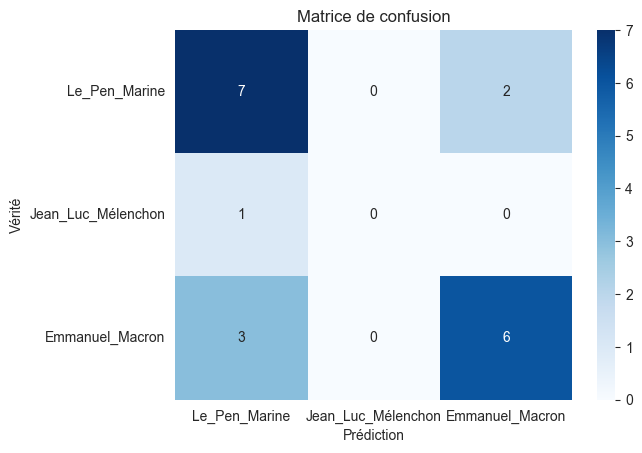

In [38]:
## random forest 
# Initialiser le modèle Random Forest
rf = RandomForestClassifier(random_state=100)  
# Entraîner le modèle
rf.fit(X_train, y_train)
# Prédire les résultats pour l'ensemble de test
y_pred = rf.predict(X_test)
# taux d'erreur
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Obtenir les noms uniques des classes de la cible (y)
class_names = df_joint['Candidat'].unique()  # Remplacez 'Nom_Colonne_Target' par le nom réel de votre colonne cible
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

# Calculer et afficher l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude (Accuracy): {accuracy}")

# Afficher la matrice de confusion avec les noms de classe à l'aide de Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

In [48]:


######## autres modeles ###########

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

### model regression logistique 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred2 = logreg.predict(X_test)
print(f"Accuracy regression logistique: {accuracy_score(y_test, y_pred2)}")

### gradient boosting 
gb = GradientBoostingClassifier(random_state=100)
gb.fit(X_train, y_train_encoded)
y_pred3 = gb.predict(X_test)
print(f"Accuracy of Gradient Boosting: {accuracy_score(y_test_encoded, y_pred3)}")

C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklear

Accuracy regression logistique: 0.7368421052631579
Accuracy of Gradient Boosting: 0.631578947368421


C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to 

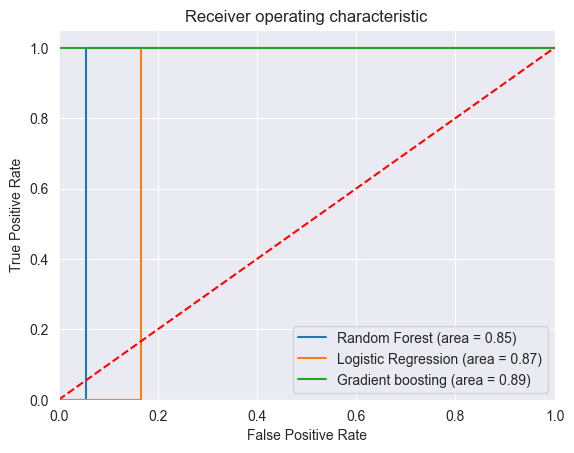

In [40]:
############ comparaison des modeles 
## courbe de ROC 

# Encoder la variable cible si elle est catégorique/string
# Cette étape créera un nouvel encodeur qui transformera les noms des classes en nombres
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# mettre à jour le modèle de régression logistique pour utiliser les données encodées
logreg = LogisticRegression()
logreg.fit(X_train, y_train_encoded)

# mettre à jour le modèle de gradient boosting pour utiliser les données encodées
gb = GradientBoostingClassifier(random_state=100)
gb.fit(X_train, y_train_encoded)


# Pour le Random Forest
logit_roc_auc1 = roc_auc_score(y_test_encoded, rf.predict_proba(X_test), multi_class='ovr', average='macro')

# Pour la régression logistique
logit_roc_auc2 = roc_auc_score(y_test_encoded, logreg.predict_proba(X_test), multi_class='ovr', average='macro')

# Pour gradient boosting
logit_roc_auc3 = roc_auc_score(y_test_encoded, gb.predict_proba(X_test), multi_class='ovr', average='macro')

# Déterminez les taux pour la courbe ROC
fpr1, tpr1, thresholds1 = roc_curve(y_test_encoded, rf.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test_encoded, logreg.predict_proba(X_test)[:, 1], pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test_encoded, gb.predict_proba(X_test)[:, 1], pos_label=1)

plt.figure()
plt.plot(fpr1, tpr1, label='Random Forest (area = %0.2f)' % logit_roc_auc1)
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot(fpr3, tpr3, label='Gradient boosting (area = %0.2f)' % logit_roc_auc3)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [41]:
logreg.predict_proba(X_test)[:, 1]

array([4.87136831e-02, 1.61042836e-02, 1.26666531e-04, 1.55142367e-02,
       1.31288225e-01, 4.14262746e-02, 4.16890585e-02, 1.53543277e-02,
       1.89943527e-02, 8.03516984e-02, 1.01936046e-03, 1.98309708e-02,
       6.97385537e-02, 3.13986811e-03, 1.01726525e-06, 6.03770852e-02,
       6.00003387e-02, 2.79203605e-03, 3.57063782e-02])

In [42]:
df_joint['Candidat'].unique() 

array(['Le_Pen_Marine', 'Jean_Luc_Mélenchon', 'Emmanuel_Macron'],
      dtype=object)

In [47]:
## test modele sur département isere
# gradient boosting 
print(gb.predict(X_isere))
## regression logistique 
print(logreg.predict(X_isere))
## random forest 
print(rf.predict(X_isere))

[0]
[0]
['Emmanuel_Macron']


In [45]:
y_isere

,Candidat
38,Emmanuel_Macron


C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


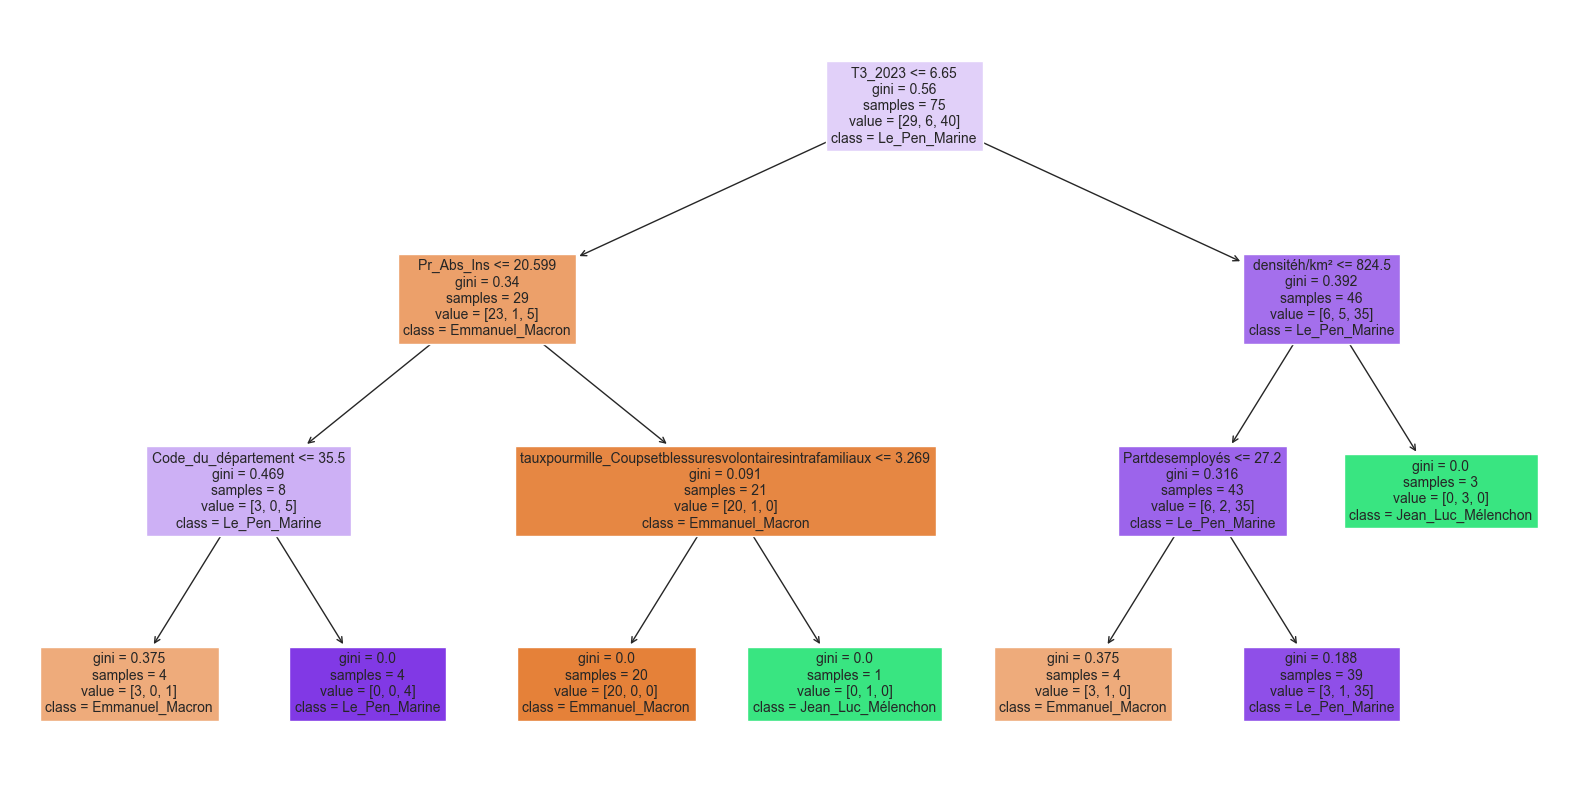

Index(['Code_du_département', 'Total_voix', 'Inscrits', 'Abstentions',
       'Pr_Abs_Ins', 'Votants', 'Pr_Vot_Ins', 'Blancs', 'Pr_Blancs_Ins',
       'Pr_Blancs_Vot',
       ...
       'tauxpourmille_Homicides', 'tauxpourmille_Traficdestupefiants',
       'tauxpourmille_Usagedestupefiants', 'tauxpourmille_Violencessexuelles',
       'tauxpourmille_Volsavecarmes',
       'tauxpourmille_Volsd_accessoiressur_vehicules',
       'tauxpourmille_Volsdanslesvehicules', 'tauxpourmille_Volsdevehicules',
       'tauxpourmille_Volssansviolencecontredespersonnes',
       'tauxpourmille_Volsviolentssansarme'],
      dtype='object', length=117)
['Emmanuel_Macron' 'Jean_Luc_Mélenchon' 'Le_Pen_Marine']


In [46]:
############################ arbre de décision ##################
#################################################################

# Encoder la variable cible si nécessaire
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)



# Créer et former le modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42,  max_depth=3)
tree_model.fit(X_train, y_train_encoded)

# Visualiser l'arbre de décision avec plot_tree
plt.figure(figsize=(20,10))  # Réglez la taille selon la taille de votre arbre
plot_tree(tree_model, feature_names=X.columns, class_names=encoder.classes_, filled=True, fontsize=10)  # Ajustez la taille de la police au besoin
plt.show()

# OU vous pouvez exporter l'arbre en format Graphviz pour une visualisation plus détaillée
export_graphviz(tree_model, out_file='tree.dot',
                feature_names=X.columns,
                class_names=encoder.classes_,
                filled=True)


print(X.columns)  # Doit afficher les noms des features utilisés pour l'entraînement
print(encoder.classes_)  # Doit afficher les noms des modalités de la cible après encodage



In [ ]:
df_joint.to_excel("C:/Users/fnour/Documents/Projet_data/DATA/df_joint.xlsx")  